In [2]:
from mqt.bench import CompilerSettings, QiskitSettings, TKETSettings, get_benchmark
from qiskit import *
import numpy as np

In [3]:
q_num=3 #number of choosen qubit
compiler_settings = CompilerSettings(qiskit=QiskitSettings(optimization_level=1))
qc = get_benchmark(
benchmark_name="ghz",
level="nativegates",
circuit_size=q_num,
compiler="qiskit",
compiler_settings=compiler_settings,
provider_name="ionq",)
print("---------------ghz---------------")
print(qc.draw())
print("=================================================================================================")

---------------ghz---------------
                                                      ┌───────────┐┌──────────┐»
   q_0: ──────────────────────────────────────────────┤1          ├┤ Rx(-π/2) ├»
                 ┌───────────┐┌──────────┐┌─────────┐ │  Rxx(π/2) │├──────────┤»
   q_1: ─────────┤1          ├┤ Rx(-π/2) ├┤ Ry(π/2) ├─┤0          ├┤ Rx(-π/2) ├»
        ┌───────┐│  Rxx(π/2) │├──────────┤├─────────┴┐└───────────┘└──────────┘»
   q_2: ┤ Rx(π) ├┤0          ├┤ Rx(-π/2) ├┤ Ry(-π/2) ├─────────────────────────»
        └───────┘└───────────┘└──────────┘└──────────┘                         »
meas: 3/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«                     ░ ┌─┐      
«   q_0: ─────────────░─┤M├──────
«        ┌──────────┐ ░ └╥┘┌─┐   
«   q_1: ┤ Ry(-π/2) ├─░──╫─┤M├───
«        └──────────┘ ░  ║ └╥┘┌─┐
«   q_2: ─────────────░──╫──╫─┤M├
«                     ░  ║  ║ └╥┘

In [4]:
from qiskit_aer import AerSimulator
from qiskit import *
from qiskit.providers.fake_provider import *
import numpy as np 
import os
from qiskit.primitives import StatevectorSampler
sampler = StatevectorSampler()
job = sampler.run([qc], shots=1000)
result = job.result()
counts= result[0].data["meas"].get_counts()
print(f" > Counts: {result[0].data["meas"].get_counts()}")

 > Counts: {'111': 468, '000': 532}


In [5]:
from qiskit.quantum_info import hellinger_fidelity
ideal_dist = {b * q_num: 0.5 for b in ["0", "1"]}
total_shots = sum(counts.values())
device_dist = {bitstr: count / total_shots for bitstr, count in counts.items()}
hf = hellinger_fidelity(ideal_dist, device_dist) #formula of Hellinger fidelity between two distributions p and q is given by $(\sum_i{p_i q_i})^2$ as FLOAT.
print("Hellinger fidelity",hf*100,"%")

Hellinger fidelity 99.8974949271003 %


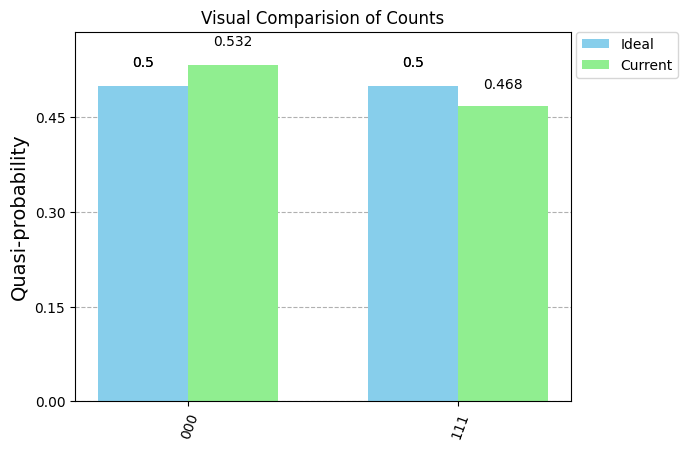

In [6]:
from qiskit.visualization import plot_histogram
legend = ['Ideal', 'Current']
plot_histogram([ideal_dist, device_dist], legend=legend, color=['skyblue','lightgreen'],title="Visual Comparision of Counts")

In [7]:
from fidelity import uniform_dist,rescale_fidelity,polarization_fidelity,hellinger_fidelity_with_expected
hellinger_fidelity_with_expected(counts,ideal_dist)

0.9989749492710029